<a href="https://colab.research.google.com/github/leonardo-toffalini/szgepes25-hf/blob/main/szgepes_hf_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feladat
Szimuláljunk $n = 25,\; 100,\; 400$ elemű mintát az $1$ paraméteres Cauchy eloszlásból: ha  $X$ "standard" Cauchy, akkor $X+m$ ilyen, a sűrűségfüggvénye R-ben a `dcauchy(x, location=m)` függvénnyel számolható.

Adjunk maximum likelihood módszerrel becslést $m$-re és vizsgáljuk meg a tulajdonságait.

A becslésnek nincs zárt alakja, ezért az R-et kell használni.

# Megoldás

### Levezetés
A Cauchy eloszlás sűrűség függvénye $\gamma = 1$-ra a következő:
$$
f(x, m) = \frac{1}{\pi} \left( \frac{1}{1 + (x - m)^2} \right)
$$

Tehát az $X_1, X_2, \ldots, X_n$ i.i.d. Cauchy mintának a likelihood függvénye a következő:
$$
L(X_i, m) = \prod_{i = 1}^{n} f(X_i, m) = \prod_{i = 1}^{n} \frac{1}{\pi} \left( \frac{1}{1 + (X_i - m)^2} \right)
$$

$$
l(X_i, m) = \log L(X_i, m) = \sum_{i = 1}^{n} \log \left(\frac{1}{\pi} \cdot \frac{1}{1 + (X_i - m)^2} \right)
$$

Most hogy kiszámoltuk a log-likelihood függvényt, már csak maximalizálni kell. A probléma hogy explicit kiszámolni ennek a függvénynek a deriváltjának a zérushelyét nehéz. Ezért numerikusan foglyuk megoldani az `nlm` függvényel.

Egy dologra figyelni kell, hogy az `nlm` minimalizál, de nekünk maximum kell. Ezért a *negatív* log-likelihood függvényt foglyuk implementálni.

### Programozás

In [1]:
set.seed(42)
ns <- c(25, 100, 400)
true_m <- 1
samples <- lapply(ns, function(n) rcauchy(n, location=true_m))

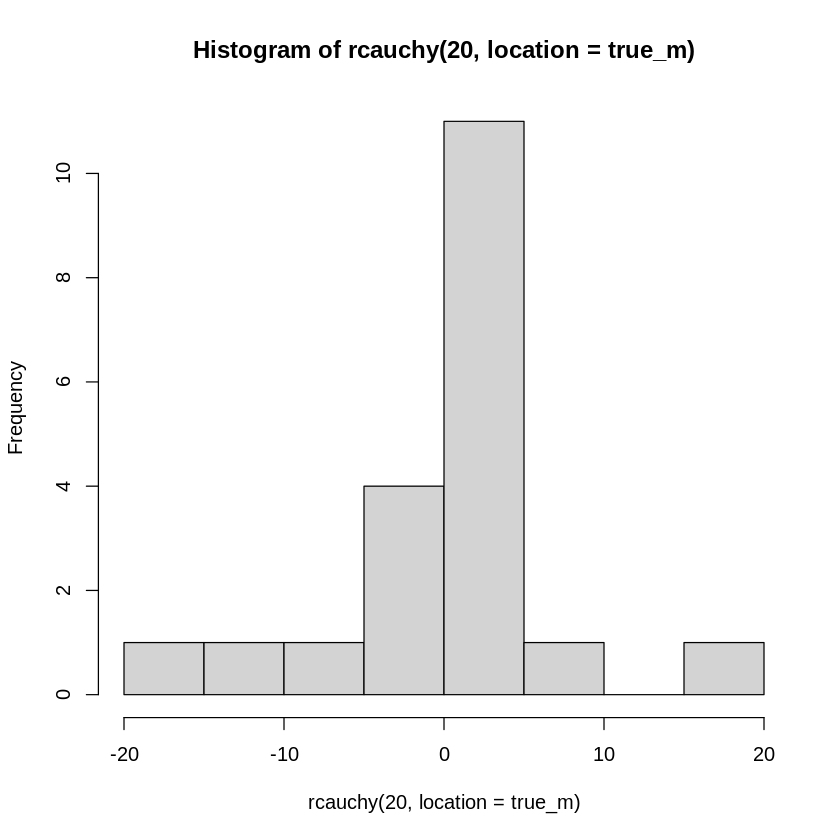

In [2]:
hist(rcauchy(20, location=true_m))

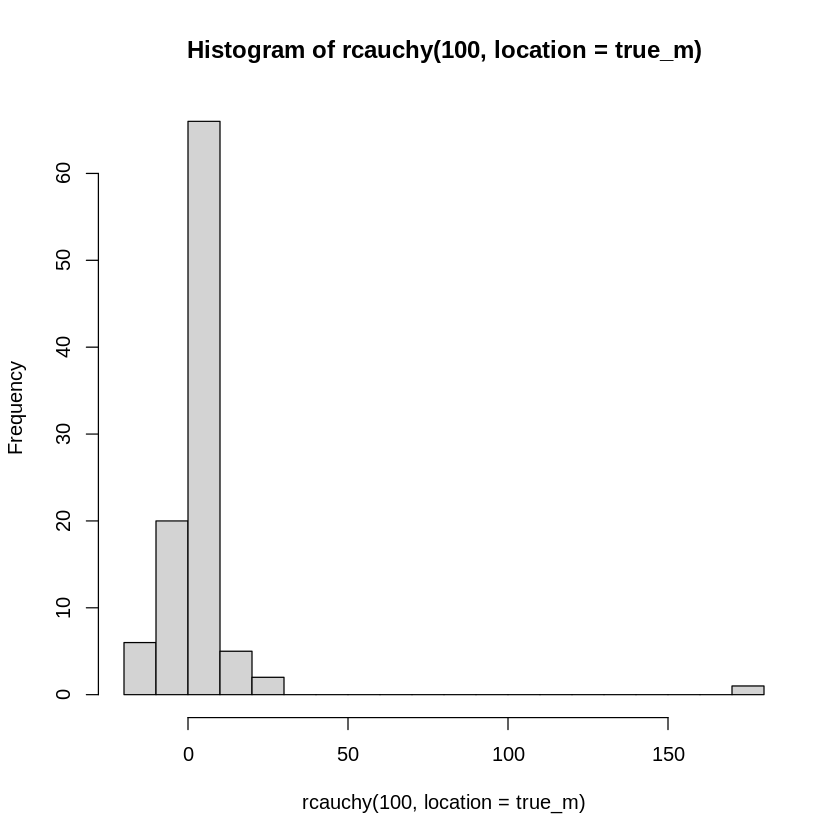

In [3]:
hist(rcauchy(100, location=true_m), breaks=20)

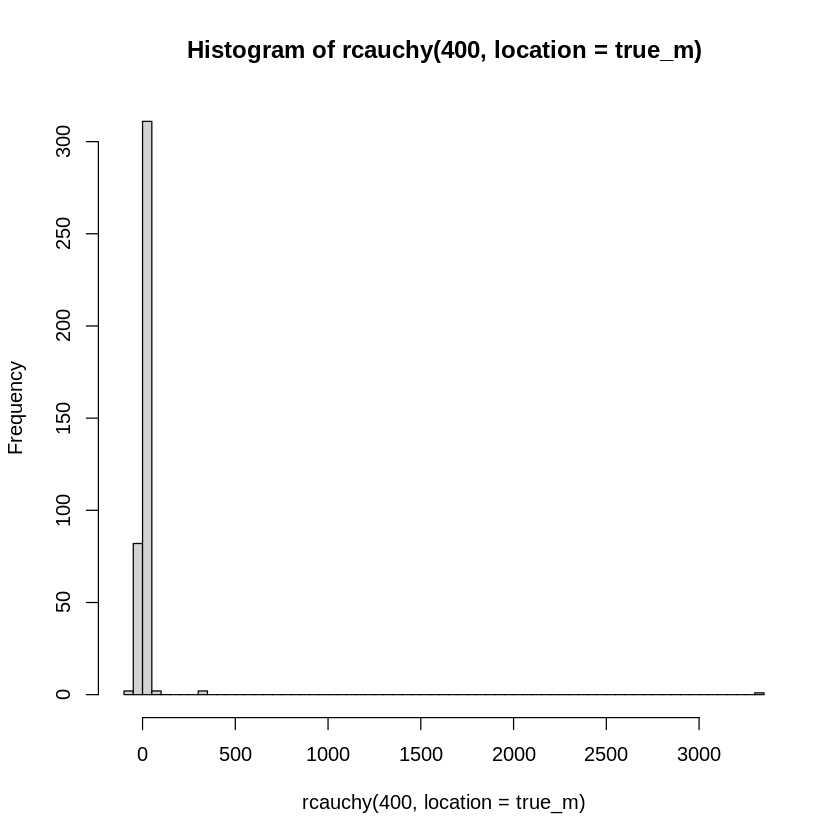

In [4]:
hist(rcauchy(400, location=true_m), breaks=80)

In [5]:
negative_log_likelihood <- function(x, m) {
  -sum(log(1/pi * 1/(1 + (x - m)^2)))
}

In [6]:
mle_m <- function(x) {
  # Starting point of 1 is arbitrary
  nlm(negative_log_likelihood, p=1, x=x, iterlim=1000)$estimate
}

In [7]:
mle_estimates <- lapply(samples, mle_m)
mle_estimates

[[1]]
[1] 0.8225637

[[2]]
[1] 0.8209115

[[3]]
[1] 1.13934

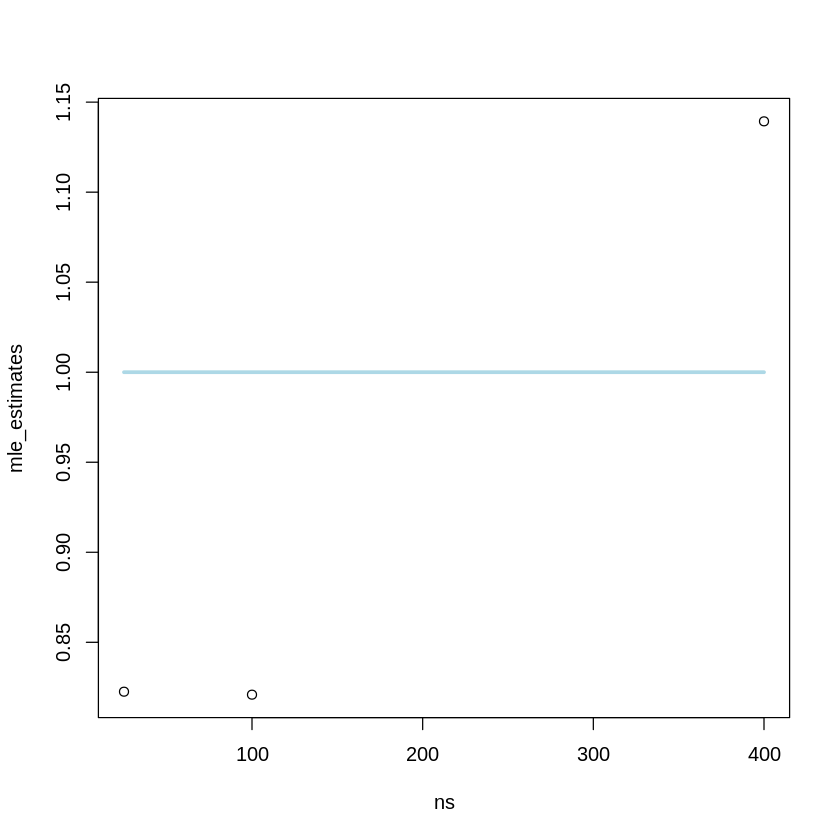

In [8]:
plot(ns, mle_estimates)
lines(ns, rep(true_m, length(ns)), col="lightblue", lw=3)

### Bónusz
Maxoljuk ki a google vm kapacitását és tekerjük fel a minta számot addig ameddig lehet.

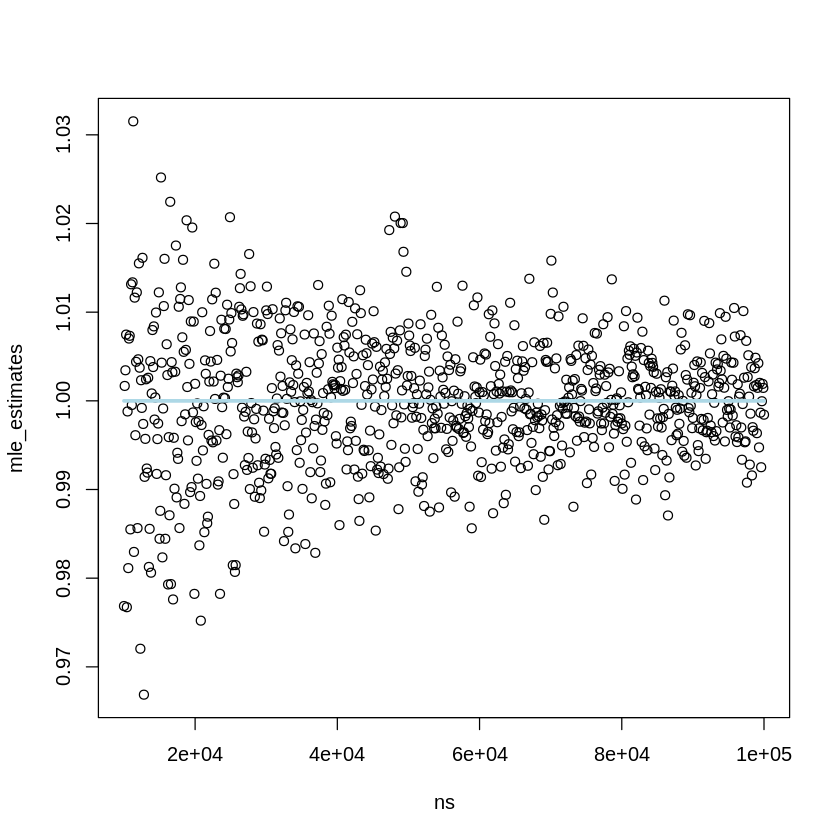

In [9]:
ns <- c(100:1000) * 100
true_m <- 1
samples <- lapply(ns, function(n) rcauchy(n, location=true_m))

mle_estimates <- lapply(samples, mle_m)

plot(ns, mle_estimates)
lines(ns, rep(true_m, length(ns)), col="lightblue", lw=3)

Nézzük meg hogy jobban konvergál-e a Newton módszer ha máshonnan indítjuk az iterációt. Például a minta átlagtól.

In [10]:
mle_m_mean_start <- function(x) {
  nlm(negative_log_likelihood, p=mean(x), x=x, iterlim=1000)$estimate
}

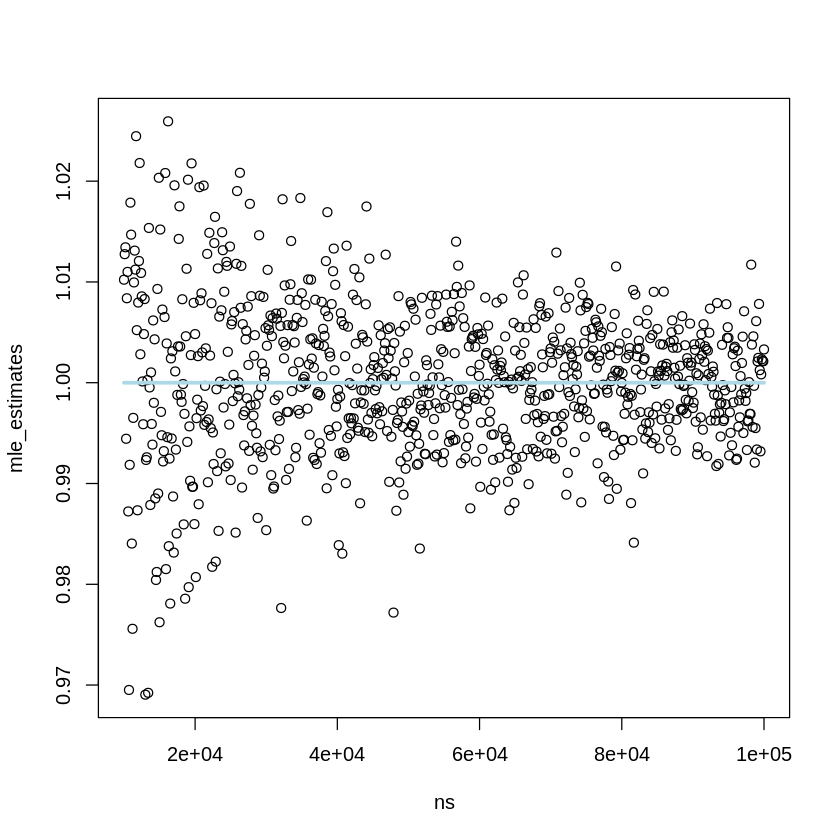

In [11]:
ns <- c(100:1000) * 100
true_m <- 1
samples <- lapply(ns, function(n) rcauchy(n, location=true_m))

mle_estimates <- lapply(samples, mle_m_mean_start)

plot(ns, mle_estimates)
lines(ns, rep(true_m, length(ns)), col="lightblue", lw=3)